# Plotting Figure 1

This script is used to plot the difference of multi-model ensemble mean change of local urban heat wave and background regional heat wave 

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import time
import gc
import util
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# import cartopy.io.shapereader as shapereader

## Step 1: Loading

### CMIP rural and urban

In [2]:
# CMIP_R
CMIP_R={}
path="../data/uhws/HWs_CMIP/"
CMIP_R["diff_raw"]={}
CMIP_R["diff_stat"]={}
for year in ["2006","2061"]:
    CMIP_R[year]={}
    for vari in ["frequency","totaldays","intensity"]:
        CMIP_R[year][vari]=pd.read_csv(path+year+"_"+vari+".csv").set_index(["lat","lon"])
    CMIP_R[year]["duration"]=CMIP_R[year]["totaldays"]/CMIP_R[year]["frequency"]
    
for vari in ["frequency","totaldays","intensity","duration"]:
    CMIP_R["diff_raw"][vari] = CMIP_R["2061"][vari]-CMIP_R["2006"][vari]
    CMIP_R["diff_stat"][vari+"_diff_mean"] = CMIP_R["diff_raw"][vari].mean(axis=1)
    CMIP_R["diff_stat"][vari+"_diff_std"] = CMIP_R["diff_raw"][vari].std(axis=1)
    #CMIP_R["diff_stat"][vari+"_diff_0.025"] = CMIP_R["diff_raw"][vari].quantile(0.025,axis=1)
    CMIP_R["diff_stat"][vari+"_diff_SNR"] = CMIP_R["diff_stat"][vari+"_diff_mean"].abs()/CMIP_R["diff_stat"][vari+"_diff_std"]

# CMIP_U
CMIP_U={}
path="../data/uhws/UHWs_CMIP/"
CMIP_U["diff_raw"]={}
CMIP_U["diff_stat"]={}
for year in ["2006","2061"]:
    CMIP_U[year]={}
    for vari in ["frequency","totaldays","intensity"]:
        CMIP_U[year][vari]=pd.read_csv(path+year+"_"+vari+".csv").set_index(["lat","lon"])
    CMIP_U[year]["duration"]=CMIP_U[year]["totaldays"]/CMIP_U[year]["frequency"]
    
for vari in ["frequency","totaldays","intensity","duration"]:
    CMIP_U["diff_raw"][vari] = CMIP_U["2061"][vari]-CMIP_U["2006"][vari]
    CMIP_U["diff_stat"][vari+"_diff_mean"] = CMIP_U["diff_raw"][vari].mean(axis=1)
    CMIP_U["diff_stat"][vari+"_diff_std"] = CMIP_U["diff_raw"][vari].std(axis=1)
    #CMIP_U["diff_stat"][vari+"_diff_0.025"] = CMIP_U["diff_raw"][vari].quantile(0.025,axis=1)
    CMIP_U["diff_stat"][vari+"_diff_SNR"] = CMIP_U["diff_stat"][vari+"_diff_mean"].abs()/CMIP_U["diff_stat"][vari+"_diff_std"]

"""
for keys in CMIP_U["diff_stat"]:
    print(keys)
    print(CMIP_U["diff_stat"][keys].describe())
"""    
    
"""
for keys in CMIP_R["diff_stat"]:
    print(keys)
    print(CMIP_R["diff_stat"][keys].describe())
"""

'\nfor keys in CMIP_R["diff_stat"]:\n    print(keys)\n    print(CMIP_R["diff_stat"][keys].describe())\n'

### CESM rural and urban

In [3]:
CESM_R={}
path="../data/uhws/HWs_CESM/"
CESM_R["diff_raw"]={}
CESM_R["diff_stat"]={}
for year in ["2006","2061"]:
    CESM_R[year]={}
    for vari in ["frequency","totaldays","intensity"]:
        CESM_R[year][vari]=pd.read_csv(path+year+"_"+vari+".csv").set_index(["lat","lon"])
    CESM_R[year]["duration"]=CESM_R[year]["totaldays"]/CESM_R[year]["frequency"]
    
for vari in ["frequency","totaldays","intensity","duration"]:
    CESM_R["diff_raw"][vari] = CESM_R["2061"][vari]-CESM_R["2006"][vari]
    CESM_R["diff_stat"][vari+"_diff_mean"] = CESM_R["diff_raw"][vari].mean(axis=1)
    CESM_R["diff_stat"][vari+"_diff_std"] = CESM_R["diff_raw"][vari].std(axis=1)
    #CESM_R["diff_stat"][vari+"_diff_0.025"] = CESM_R["diff_raw"][vari].quantile(0.025,axis=1)
    CESM_R["diff_stat"][vari+"_diff_SNR"] = CESM_R["diff_stat"][vari+"_diff_mean"].abs()/CESM_R["diff_stat"][vari+"_diff_std"]

"""
for keys in CESM_R["diff_stat"]:
    print(keys)
    print(CESM_R["diff_stat"][keys].describe())
"""

CESM_U={}
path="../data/uhws/UHWs_CESM/"
CESM_U["diff_raw"]={}
CESM_U["diff_stat"]={}
for year in ["2006","2061"]:
    CESM_U[year]={}
    for vari in ["frequency","totaldays","intensity"]:
        CESM_U[year][vari]=pd.read_csv(path+year+"_"+vari+".csv").set_index(["lat","lon"])
    CESM_U[year]["duration"]=CESM_U[year]["totaldays"]/CESM_U[year]["frequency"]
    
for vari in ["frequency","totaldays","intensity","duration"]:
    CESM_U["diff_raw"][vari] = CESM_U["2061"][vari]-CESM_U["2006"][vari]
    CESM_U["diff_stat"][vari+"_diff_mean"] = CESM_U["diff_raw"][vari].mean(axis=1)
    CESM_U["diff_stat"][vari+"_diff_std"] = CESM_U["diff_raw"][vari].std(axis=1)
    #CESM_U["diff_stat"][vari+"_diff_0.025"] = CESM_U["diff_raw"][vari].quantile(0.025,axis=1)
    CESM_U["diff_stat"][vari+"_diff_SNR"] = CESM_U["diff_stat"][vari+"_diff_mean"].abs()/CESM_U["diff_stat"][vari+"_diff_std"]

"""
for keys in CESM_U["diff_stat"]:
    print(keys)
    print(CESM_U["diff_stat"][keys].describe())
"""

'\nfor keys in CESM_U["diff_stat"]:\n    print(keys)\n    print(CESM_U["diff_stat"][keys].describe())\n'

### Merge CMIP with CESM

In [4]:
merge_U={}
for vari in ["frequency","totaldays","intensity","duration"]:
    merge_U[vari]=pd.concat([CMIP_U["diff_raw"][vari].reset_index(),
                    CESM_U["diff_raw"][vari]["002_max"].reset_index()["002_max"]],
                    axis=1).set_index(["lat","lon"])
    merge_U[vari+"_diff_mean"]=merge_U[vari].mean(axis=1)
    merge_U[vari+"_diff_std"]=merge_U[vari].std(axis=1)
    merge_U[vari+"_diff_SNR"]=merge_U[vari+"_diff_mean"].abs()\
                                /merge_U[vari+"_diff_std"]
    
merge_R={}
for vari in ["frequency","totaldays","intensity","duration"]:
    merge_R[vari]=pd.concat([CMIP_R["diff_raw"][vari].reset_index(),
                    CESM_R["diff_raw"][vari]["002_max"].reset_index()["002_max"]],
                    axis=1).set_index(["lat","lon"])
    merge_R[vari+"_diff_mean"]=merge_R[vari].mean(axis=1)
    merge_R[vari+"_diff_std"]=merge_R[vari].std(axis=1)
    merge_R[vari+"_diff_SNR"]=merge_R[vari+"_diff_mean"].abs()\
                                /merge_R[vari+"_diff_std"]

## Step 2: Plotting

In [5]:
def setup_globe(ax):
    ax.set_extent([-180,180,-60,75],crs=ccrs.PlateCarree())
    ax.coastlines(zorder=5)
    ax.add_feature(cartopy.feature.LAND, facecolor='lightgray',zorder=0)
    ax.add_feature(cartopy.feature.OCEAN, facecolor='whitesmoke',zorder=0)
    ax.add_feature(cartopy.feature.LAKES, facecolor='none',edgecolor='black',
                   linewidth=0.5,zorder=5)
    ax.add_feature(cartopy.feature.BORDERS,
                   facecolor='none',
                   edgecolor='black',
                   linewidth=0.5,zorder=5)


def setup_colorbar_text(ax,p,title_text,var_text):
    ax.set_xlabel("")
    ax.set_ylabel("")
    cbar = plt.colorbar(p, ax=ax,
                    orientation="vertical",
                    fraction=0.1,
                    shrink=0.75,
                    pad=0.02,
                    aspect=30,
                    extend="both")
    g = ax.gridlines(color='grey', linestyle='--', draw_labels=False,zorder=4)
    g.xlocator = mticker.FixedLocator([-90, 0, 90])
    lon_formatter = LongitudeFormatter()#zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    props = dict(boxstyle='round', facecolor='lightcyan')
    # place a text box in upper left in axes coords
    ax.text(0.03, 0.20, var_text, transform=ax.transAxes, fontsize=12,
             verticalalignment='top', bbox=props,zorder=6)
    ax.set_title(title_text, fontweight="bold", loc="left")
    
def plot_scatter(ax,df,vmin,vmax,cmap):
    df_temp = df.copy()
    df_temp["lon_new"] = np.where(df_temp['lon'] <= 180, 
                                  df_temp['lon'], 
                                  df_temp['lon']-360)
    p = ax.scatter(df_temp["lon"],df_temp["lat"],c=df_temp[0],
                   s=0.5,
                   vmin=vmin,
                   vmax=vmax,
                   cmap=cmap,
                   zorder=3,rasterized=True)
    
    return p
    
def plot_map(df,i,vmin,vmax,cmap,title_text,var_text):
    ax = plt.subplot(2,2,i+1,projection=ccrs.PlateCarree())
    setup_globe(ax)
    if i==0: 
        ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
    elif i==1:
        pass
    elif i==2:
        ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
        ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
    elif i==3:
        ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
    p = plot_scatter(ax,df,vmin,vmax,cmap)
    setup_colorbar_text(ax,p,title_text,var_text) 

intensity


,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,0.452913
std,25.646228,111.895429,0.404761
min,-54.188499,0.000000,-0.854514
25%,8.952900,36.250000,0.173434
50%,29.685900,100.000000,0.382606
75%,42.879601,260.000000,0.642583
max,70.209396,358.750000,2.601111


##########################################
frequency


,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,0.975676
std,25.646228,111.895429,1.553850
min,-54.188499,0.000000,-4.372222
25%,8.952900,36.250000,-0.005556
50%,29.685900,100.000000,0.438889
75%,42.879601,260.000000,1.572222
max,70.209396,358.750000,11.738889


##########################################
duration


,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,1.444568
std,25.646228,111.895429,11.989251
min,-54.188499,0.000000,-110.878895
25%,8.952900,36.250000,0.049989
50%,29.685900,100.000000,0.673502
75%,42.879601,260.000000,1.821096
max,70.209396,358.750000,344.208566


##########################################
totaldays


,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,13.525844
std,25.646228,111.895429,29.604927
min,-54.188499,0.000000,-92.505556
25%,8.952900,36.250000,0.330556
50%,29.685900,100.000000,5.055556
75%,42.879601,260.000000,18.275000
max,70.209396,358.750000,242.550000


##########################################


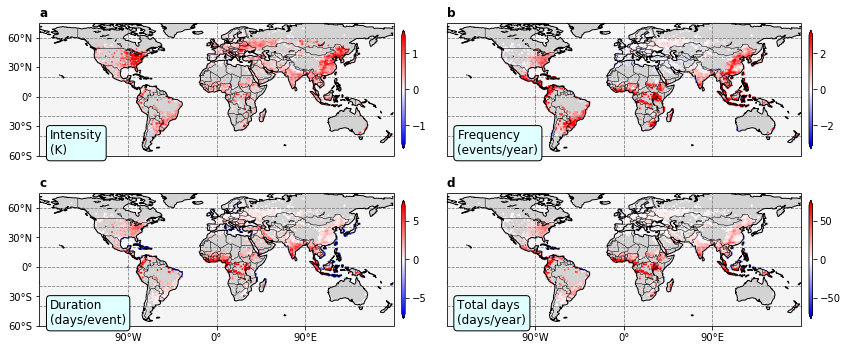

In [6]:
fig = plt.figure(figsize=(12,5))
cmap="bwr"

var_list=["intensity","frequency","duration","totaldays"]

max_val={"frequency":3,
         "totaldays":70,
         "intensity":1.5,
         "duration":7}

min_val={"frequency":-3,
         "totaldays":-70,
         "intensity":-1.5,
         "duration":-7}

var_text_dict={"frequency":"Frequency\n(events/year)",
               "totaldays":"Total days\n(days/year)",
               "intensity":"Intensity\n(K)",
               "duration":"Duration\n(days/event)"}

title_text_dict={"frequency":"b",
                 "totaldays":"d",
                 "intensity":"a",
                 "duration":"c"}


for i in range(4):
    val = var_list[i]
    print(val)
    urban=merge_U[val+"_diff_mean"].reset_index()
    rural=merge_R[val+"_diff_mean"].reset_index()
    diff=urban[["lat","lon"]]
    diff[0]=urban[0]-rural[0]
    display(diff.describe())
    plot_map(diff,i,min_val[val], max_val[val],cmap,title_text_dict[val],var_text_dict[val])
    print("##########################################")
    
plt.tight_layout()
#plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("../figures/urban_gridcell.pdf",dpi=188)
plt.show()

## Step 3: Check intensity between (1K - 1.5K)

In [7]:
val = "intensity"
urban=merge_U[val+"_diff_mean"].reset_index()
rural=merge_R[val+"_diff_mean"].reset_index()
diff=urban[["lat","lon"]]
diff["intensity_diff"]=urban[0]-rural[0]

In [8]:
diff[(diff["intensity_diff"]>1)].describe()

,lat,lon,intensity_diff
count,408.000000,408.000000,408.000000
mean,31.864032,175.805760,1.358395
std,21.022788,96.476895,0.317107
min,-38.167500,0.000000,1.000503
25%,30.628300,110.000000,1.120049
50%,39.109901,126.250000,1.271316
75%,43.821999,277.500000,1.506917
max,57.015701,358.750000,2.601111


In [9]:
(diff[(diff["intensity_diff"]>1)].shape[0])/(diff["intensity_diff"].shape[0])*100

9.191259292633475